In [1]:
from igraph import *
import random

In [2]:
teams = 20
players_per_team = 20
min_stayed = 0.7 * players_per_team
transfer_windows = 10

In [8]:
def GenerateFootballGraph(teams, players_per_team, min_stayed, transfer_windows):

    #Generate team_labels
    team_labels = []
    for i in range(0,teams):
        lst = [*range(i*players_per_team, (i+1)*players_per_team)]
        team_labels.append(lst)

    #Generate graph
    test_graph = Graph()
    test_graph.add_vertices(teams*players_per_team)
    for t in range(0,teams):
        for i in range(0,players_per_team):
            for j in range(i,players_per_team-1):
                test_graph.add_edges([(i + t * players_per_team ,j+ 1 + t * players_per_team)])


    #Make transfers
    for times in range(0,transfer_windows):
        for i in range(0,teams-1):
            players_chosen = int((len(team_labels[i]) - 14) / 2)
            for j in range(0,players_chosen):
                player_to_transfer = (team_labels[i][random.randint(0, len(team_labels[i]) - 1)])
                team_labels[i].remove(player_to_transfer)
                new_team = random.randint(0,teams-1)
                if new_team == i:
                    new_team += 1
                    new_team %= teams
                team_labels[new_team].append(player_to_transfer)
                for k in team_labels[new_team]:
                    test_graph.add_edges([(player_to_transfer,k)])
    Graph.simplify(test_graph)
    return test_graph

In [9]:
g = GenerateFootballGraph(teams, players_per_team, min_stayed, transfer_windows)


In [5]:
import numpy
def lpa_overlapping(graph, max_communities, max_iterations, init_graph = True):
    print("Basic lpa with overlapping communities, begin...")
    vertices_count = len(graph.vs)
    counters = [0] * vertices_count
    
    
    if init_graph == True:
        i = 0
        for v in graph.vs:
            v["communities"] = [(i, 1)]
            i += 1
            
    
    convergence = False
    iteration = 0
    while convergence == False and iteration < max_iterations:
        iteration += 1
        convergence = True
        
        for idx in range(vertices_count):
            counters[idx] = 0
            
        for v in graph.vs:
            for com, weight in v["communities"]:
                counters[com] += weight
            
        unique = sum(1 if counter > 0 else 0 for counter in counters)
        print("Iteration " + str(iteration) + ",communities " + str(unique))

        for v in graph.vs:
            current_communities = v["communities"]   
            
            #clear counters
            for idx in range(vertices_count):
                counters[idx] = 0
            
            for e in v.all_edges():     
                if v == e.target_vertex and v == e.source_vertex:
                    print("Warn - out vertex equals current vertex")
                elif v != e.target_vertex:
                    for com, weight in e.target_vertex["communities"]:
                        counters[com] += weight
                elif v != e.source_vertex:
                    for com, weight in e.target_vertex["communities"]:
                        counters[com] += weight
                
            max_value = max(counters)
            sorted_counters = numpy.argsort(counters)[::-1]
            new_communities = []
            
            idx = 0
            
            if max_value == 0:
                continue
                
            normalize_factor = sum(counters)
            while counters[sorted_counters[idx]] / normalize_factor >= 1 / max_communities:
                new_communities.append((sorted_counters[idx], counters[sorted_counters[idx]] / max_value))
                idx += 1
            
            if idx == 0:
                new_communities = current_communities
               
            if len(list(set(new_communities) - set(current_communities))) > 0:
                convergence = False
                
            weight_sum = sum(w for com, w in new_communities)
            for i in range(len(new_communities)):
                new_communities[i] = (new_communities[i][0], new_communities[i][1] / weight_sum)
                
            v["communities"] = new_communities
            
    
    for v in graph.vs:
        normalized = []
        for com, _ in v["communities"]:
            normalized.append(com)
        v["communities"] = normalized

In [14]:
tab = lpa_overlapping(g,g.vcount(),100)

Basic lpa with overlapping communities, begin...
Iteration 1,communities 400
Iteration 2,communities 399
Iteration 3,communities 396
Iteration 4,communities 381
Iteration 5,communities 357
Iteration 6,communities 325
Iteration 7,communities 297
Iteration 8,communities 273
Iteration 9,communities 255
Iteration 10,communities 235
Iteration 11,communities 213
Iteration 12,communities 207
Iteration 13,communities 195
Iteration 14,communities 185
Iteration 15,communities 175
Iteration 16,communities 162
Iteration 17,communities 153
Iteration 18,communities 141
Iteration 19,communities 131
Iteration 20,communities 124
Iteration 21,communities 117
Iteration 22,communities 112
Iteration 23,communities 110
Iteration 24,communities 103
Iteration 25,communities 102
Iteration 26,communities 98
Iteration 27,communities 95
Iteration 28,communities 94
Iteration 29,communities 84
Iteration 30,communities 81
Iteration 31,communities 79
Iteration 32,communities 76
Iteration 33,communities 73
Iteration 3

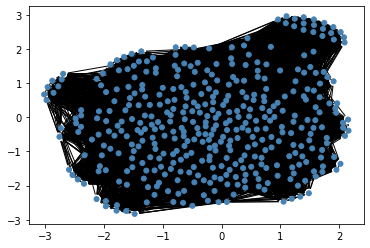

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plot(g, target=ax)